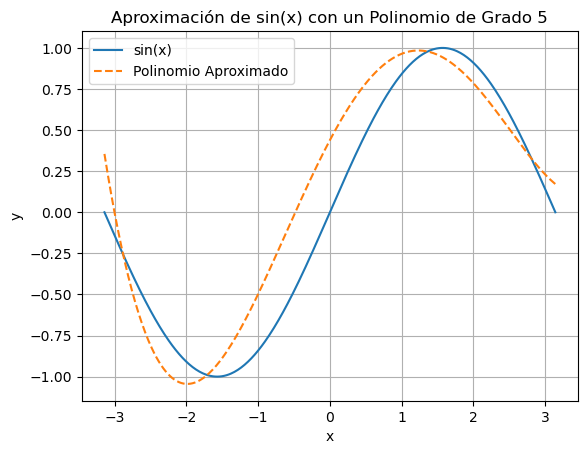

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x = sp.symbols('x')

# Definir los coeficientes del polinomio de grado 5
a0, a1, a2, a3, a4, a5 = sp.symbols('a0 a1 a2 a3 a4 a5')

# Definir el polinomio de grado 5
p = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5

# Definir la función objetivo sin(x)
funcion_objetivo = sp.sin(x)

# Definir la función de error como la sumatoria de (p(x) - sin(x))^2
n_puntos = 100
x_vals = np.linspace(-np.pi, np.pi, n_puntos)
error = sum([(p.subs(x, val) - funcion_objetivo.subs(x, val))**2 for val in x_vals])

# Definir la tasa de aprendizaje y el número de iteraciones
tasa_aprendizaje = 1e-6
max_iteraciones = 10000

# Inicializar los coeficientes del polinomio
coeficientes = {a0: np.random.rand(), a1: np.random.rand(), a2: np.random.rand(),
                a3: np.random.rand(), a4: np.random.rand(), a5: np.random.rand()}

# Función para calcular el gradiente del error respecto a los coeficientes
gradientes = [sp.diff(error, coef) for coef in [a0, a1, a2, a3, a4, a5]]

# Descenso del gradiente
for _ in range(max_iteraciones):
    gradiente_evaluado = [gradiente.evalf(subs=coeficientes) for gradiente in gradientes]
    for i, coef in enumerate([a0, a1, a2, a3, a4, a5]):
        coeficientes[coef] -= tasa_aprendizaje * gradiente_evaluado[i]

# Crear una función de numpy a partir del polinomio con los coeficientes optimizados
p_optimized = p.subs(coeficientes)
p_optimized_func = sp.lambdify(x, p_optimized, 'numpy')

# Graficar sin(x) y p(x) en el intervalo [-pi, pi]
x_vals = np.linspace(-np.pi, np.pi, 400)
sin_vals = np.sin(x_vals)
p_vals = p_optimized_func(x_vals)

plt.plot(x_vals, sin_vals, label='sin(x)')
plt.plot(x_vals, p_vals, label='Polinomio Aproximado', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de sin(x) con un Polinomio de Grado 5')
plt.grid(True)
plt.show()